Dataset Overview:
        Date       Sales
0 2023-01-01  101.000000
1 2023-01-02  143.123596
2 2023-01-03   66.247191
3 2023-01-04  124.370787
4 2023-01-05  114.494382

Missing Values:
Date     0
Sales    0
dtype: int64


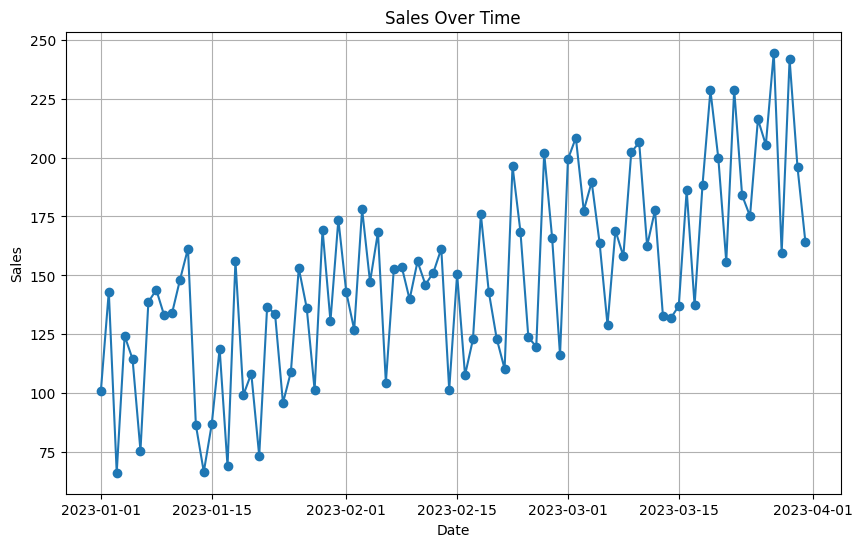

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "sales_forecasting_sample.csv"  # Update if needed
df = pd.read_csv(file_path, parse_dates=["Date"])

# Display the first 5 rows
print("Dataset Overview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Sales'], marker='o')
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid()
plt.show()

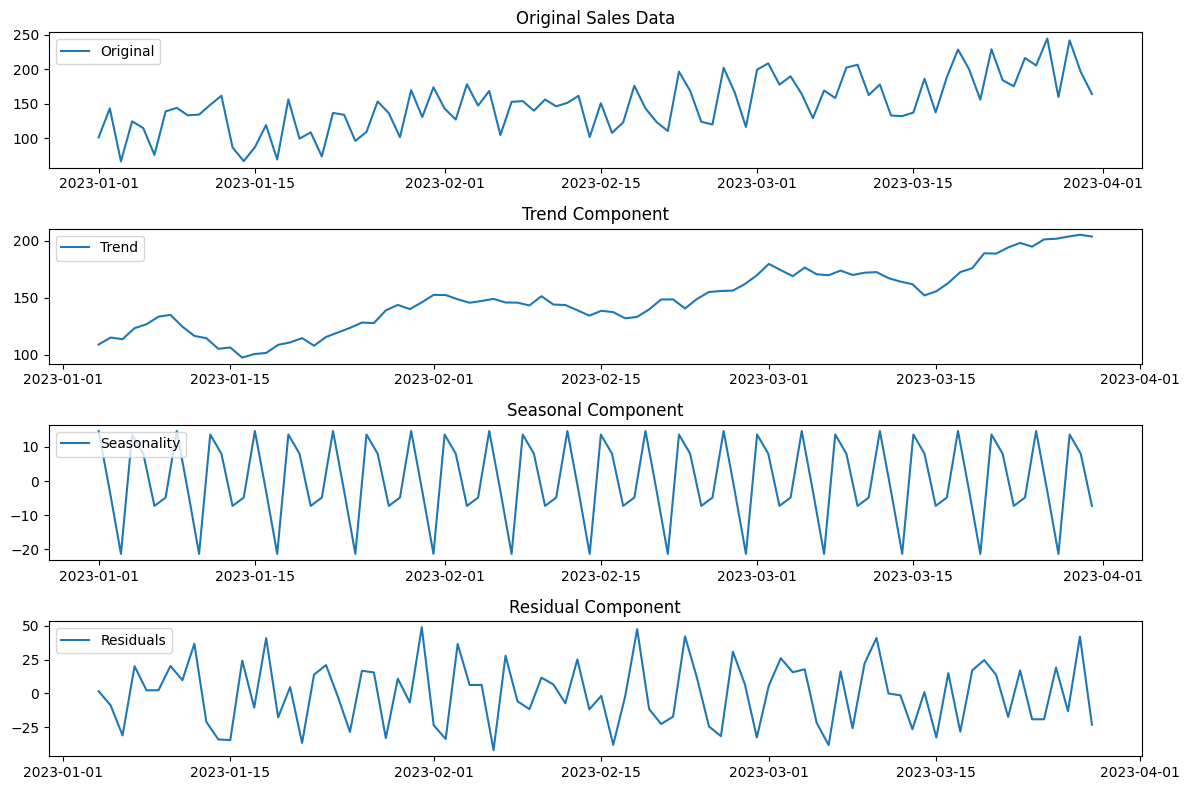

In [2]:
# Import the seasonal_decompose function
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the 'Date' column as the index for time series analysis
df.set_index("Date", inplace=True)

# Decompose the time series data
decomposition = seasonal_decompose(df["Sales"], model="additive", period=7)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df["Sales"], label="Original")
plt.legend(loc="upper left")
plt.title("Original Sales Data")

plt.subplot(412)
plt.plot(decomposition.trend, label="Trend")
plt.legend(loc="upper left")
plt.title("Trend Component")

plt.subplot(413)
plt.plot(decomposition.seasonal, label="Seasonality")
plt.legend(loc="upper left")
plt.title("Seasonal Component")

plt.subplot(414)
plt.plot(decomposition.resid, label="Residuals")
plt.legend(loc="upper left")
plt.title("Residual Component")

plt.tight_layout()
plt.show()

In [3]:
# Install Prophet
!pip install prophet

# Import the Prophet class
from prophet import Prophet

In [4]:
# Reset index to prepare for Prophet
df.reset_index(inplace=True)

# Rename columns to match Prophet's requirements
prophet_df = df.rename(columns={"Date": "ds", "Sales": "y"})

# Display the first few rows
print("Prepared Data for Prophet:")
print(prophet_df.head())

Prepared Data for Prophet:
          ds           y
0 2023-01-01  101.000000
1 2023-01-02  143.123596
2 2023-01-03   66.247191
3 2023-01-04  124.370787
4 2023-01-05  114.494382


In [5]:
# Initialize the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(prophet_df)

# Create future dates for forecasting
future = model.make_future_dataframe(periods=30)  # Forecasting the next 30 days
print("\nFuture Dates:")
print(future.tail())

# Generate forecasts
forecast = model.predict(future)

# Display forecasted data
print("\nForecasted Data:")
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail())

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8n7i6rs_/zwx2_4a7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8n7i6rs_/as94c275.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35593', 'data', 'file=/tmp/tmp8n7i6rs_/zwx2_4a7.json', 'init=/tmp/tmp8n7i6rs_/as94c275.json', 'output', 'file=/tmp/tmp8n7i6rs_/prophet_modeld1k9z5p1/prophet_model-20241218010725.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:07:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:07:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Future Dates:
            ds
115 2023-04-26
116 2023-04-27
117 2023-04-28
118 2023-04-29
119 2023-04-30

Forecasted Data:
            ds        yhat  yhat_lower  yhat_upper
115 2023-04-26  237.644022  205.292533  271.509734
116 2023-04-27  230.075326  197.803836  262.703015
117 2023-04-28  214.660508  181.193089  250.015157
118 2023-04-29  220.004304  186.019607  255.419708
119 2023-04-30  239.604606  205.666088  271.148149


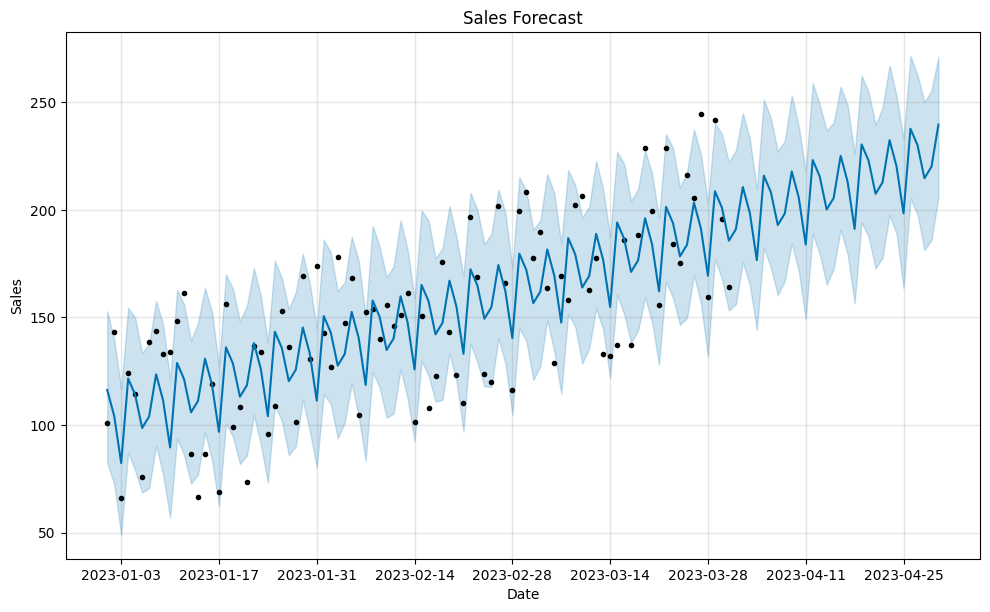

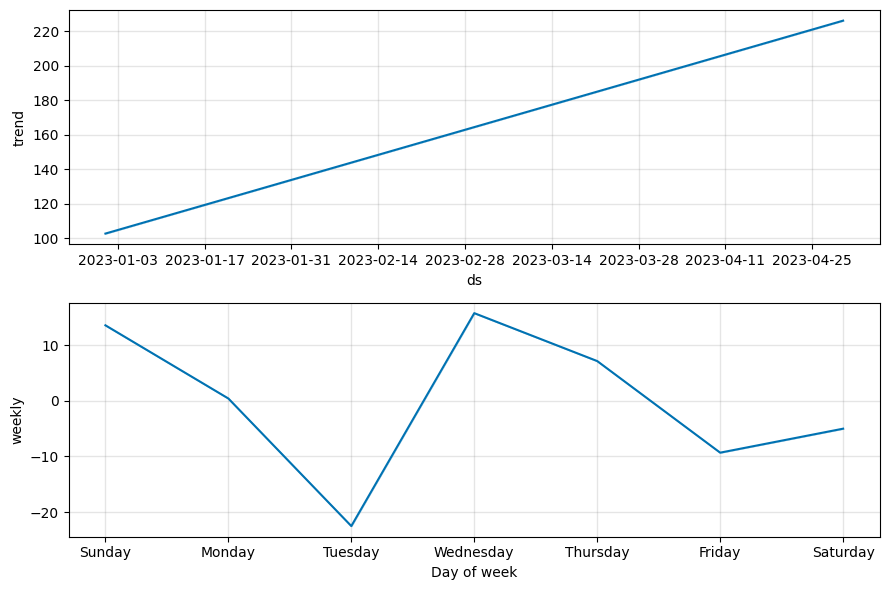

In [6]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Plot the trend and seasonality components
fig2 = model.plot_components(forecast)
plt.show()

In [7]:
# Save the forecasted data
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].to_csv("sales_forecast_results.csv", index=False)
print("Forecasted results saved successfully!")

Forecasted results saved successfully!
